In [4]:
# imports
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

# Some imports for handling images
import base64
from io import BytesIO
from PIL import Image

In [5]:
# Load environment variables. OPEN_API_KEY and value is stored in .env file
# Verify the format of OPEN_API_KEY value.

load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
openai = OpenAI()

OpenAI API Key exists and begins sk-proj-


In [6]:
# model used for image here is DALL-E-3

def artist(city):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

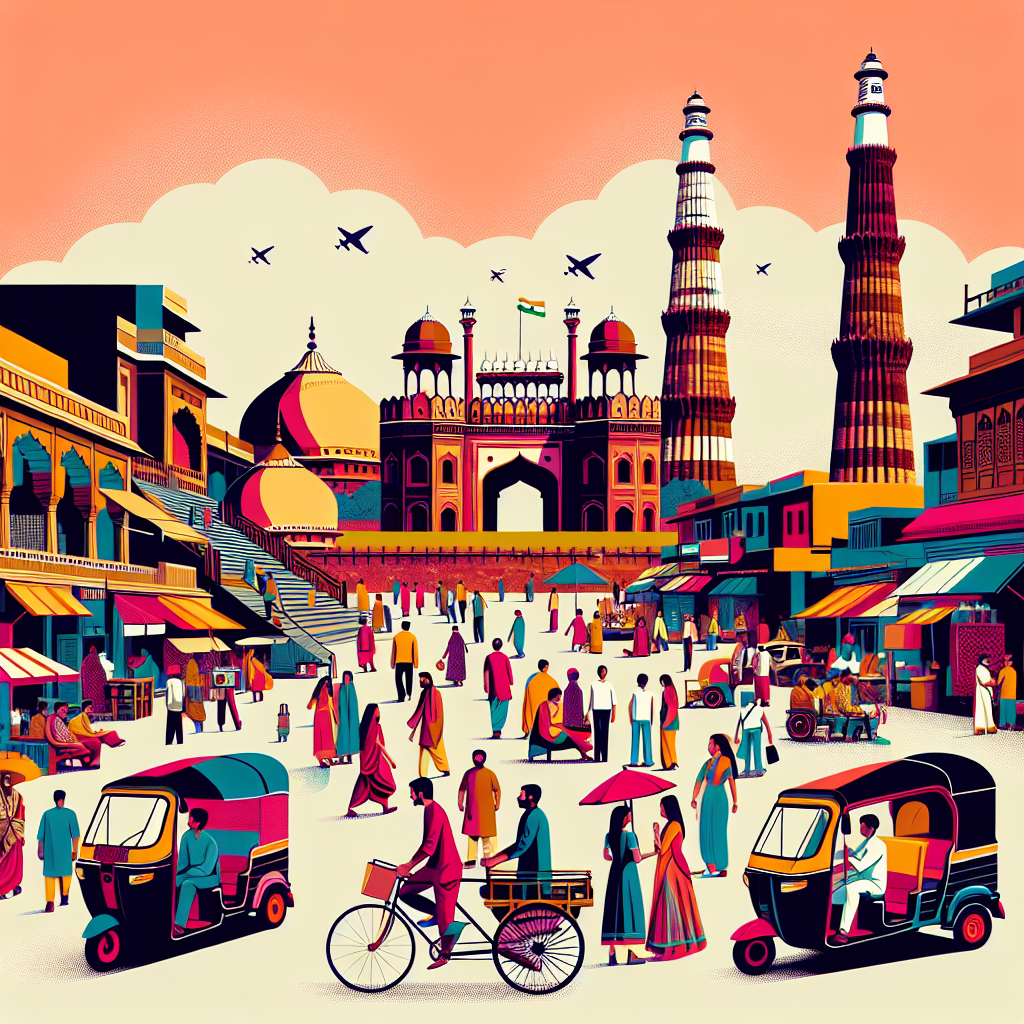

In [7]:
# Call above function with sample input and display

image = artist("Delhi")
display(image)